In [409]:
import numpy as np
import chainer
from chainer import cuda, Function, gradient_check, report, training, utils, Variable
from chainer import datasets, iterators, optimizers, serializers
from chainer import Link, Chain, ChainList
import chainer.functions as F
import chainer.links as L
from chainer.training import extensions
from matplotlib import pyplot as plt
%matplotlib inline 

In [479]:
def make_f(N=50):
    t = 0
    p = None
    w = None
    r = None
    p2 = None
    w2 = None
    r2 = None
    
    def rst():
        nonlocal p,w,r
        p = np.random.rand(N) * 100
        w = np.random.rand(N) * 2 + 1
        r = np.random.rand(N) * 0 + 1
    rst()
    
    def next():
        nonlocal t
        t += 0.1
        a = r * np.sin(w * t + p)
        a = np.where(a>0,np.ones_like(a),np.zeros_like(a));
        a+= r * np.sin(2*w * t + p)*0
        return Variable( a.reshape(-1,1).astype(np.float32) )
    return (next,rst)
(f,f_rst) = make_f()

In [480]:
f_rst()
li = []
for i in range(300):
    li.append(f().data[0])
li = np.array(li).flatten()

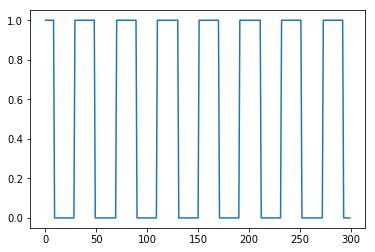

In [481]:
plt.plot(li)

In [482]:
class RNN(Chain):
    def __init__(this):
        N = 100
        super().__init__(
            fst=L.Linear(1,N),
            mid=L.LSTM(N, N),  
            out=L.Linear(N, 1),  
        )

    def reset_state(this):
        this.mid.reset_state()

    def __call__(this, x):
        g = this.fst(x)
        h = this.mid(g)
        y = this.out(h)
        return y 

class CSR(Chain):
    def __init__(this,pred):
        super().__init__(
            pred = pred
        )

    def reset_state(this):
        this.pred.reset_state()

    def __call__(this, x, t):
        return F.mean_squared_error(this.pred(x),t)
    
    
rnn = RNN()
model = CSR(rnn)
optimizer = optimizers.Adam()
optimizer.setup(model)

In [ ]:
loss = 0
count = 0
dep = 100
stp = 5000
prt = 100

rnn.reset_state()
t = f()
for i in range(stp*dep):
    count += 1
    
    x = t
    t = f()
    
    tmp = model(x,t)
    if count % dep > 20:
        loss += tmp
   
    if  (count) % dep == 0:
        model.cleargrads()
        loss.backward()
        loss.unchain_backward()
        optimizer.update()
    
        if ((i//dep)%prt == 0):
            print ("{},{}".format(i//dep,loss.data))
        loss = 0
        
    #if ( i % int(dep * 20) == 0 ):
        f_rst() #!!! DO NOT RESET MANY TIMES !!!
        #print ("RST")
        rnn.reset_state()
        

0,56.92262649536133
100,4.23738431930542
200,4.224147319793701
300,3.9119760990142822
400,3.416555643081665
500,2.557797431945801
600,2.53178071975708
700,2.2895829677581787
800,2.013157367706299
900,2.105375051498413
1000,1.8600903749465942
1100,1.802591323852539
1200,1.86253023147583
1300,1.8994346857070923
1400,1.7653520107269287
1500,1.8783365488052368
1600,1.8293628692626953
1700,1.8802186250686646
1800,1.8789136409759521
1900,1.7431825399398804
2000,1.7364932298660278
2100,1.619843602180481
2200,2.0514755249023438
2300,1.8073291778564453
2400,1.6047173738479614
2500,1.699629783630371
2600,1.8057515621185303
2700,1.6595309972763062
2800,1.8130801916122437
2900,1.806328535079956
3000,1.7447305917739868
3100,1.6980777978897095
3200,1.9168537855148315
3300,1.840683102607727
3400,1.8085016012191772
3500,1.6276001930236816
3600,1.7367078065872192
3700,1.7452809810638428
3800,1.7180896997451782
3900,1.7578952312469482
4000,1.6400760412216187
4100,1.8039798736572266
4200,1.72647786140441

In [2]:
rnn.reset_state()
f_rst()

pre = 500
prd = 500

liy = []
lit = []
x = f()
for i in range (prd + pre):
    y = rnn(x)
    t = f()
    
    liy.append(y.data[0:1])
    lit.append(t.data[0:1])
    
    if i < pre :
        x = t
    else:
        x = y
liy = np.array(liy).flatten()
lit = np.array(lit).flatten()


NameError: name 'prd' is not defined

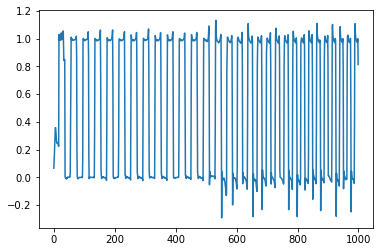

In [509]:
plt.plot(liy)
#plt.plot(lit)

In [1]:
-1 % 10

9